## Local Relational Novelty

> Based on Kyriakou et. al. (2022). Novelty and the Structure of Design Landscapes: A Relational View of Online Innovation Communities

> For a single person similarity score of a particular phase, we will get the compared similarity score of the other people in the previous phase. We will identify the one with the highest similarity score to the other person. The novelty measure is then 1 - the highest similarity score. For each design in a phase, the novelty measure. Novelty is a dependent variable in our model. 

In [1]:
%store -r df1
%store -r df2
%store -r df3
%store -r df4

%store -r df1_bogota0
%store -r df2_bogota0
%store -r df3_bogota0
%store -r df4_bogota0

%store -r df1_bogota1
%store -r df2_bogota1
%store -r df3_bogota1
%store -r df4_bogota1

%store -r df1_bogota2
%store -r df2_bogota2
%store -r df3_bogota2
%store -r df4_bogota2

%store -r subset_bogota0_phase1
%store -r subset_bogota0_phase2
%store -r subset_bogota0_phase3
%store -r overall_phase4_bogota0
%store -r overall_phase5_bogota0
%store -r subset_bogota1_phase1
%store -r subset_bogota1_phase2
%store -r subset_bogota1_phase3
%store -r overall_phase4_bogota1
%store -r overall_phase5_bogota1
%store -r subset_bogota2_phase1
%store -r subset_bogota2_phase2
%store -r subset_bogota2_phase3
%store -r overall_phase4_bogota2
%store -r subset_bogota2_phase5
%store -r subset_bogota3_phase1
%store -r overall_phase1_bogota3
%store -r overall_phase2_bogota3
%store -r subset_bogota3_phase3
%store -r overall_phase4_bogota3
%store -r overall_phase5_bogota3

%store -r overall_phase1
%store -r overall_phase2
%store -r overall_phase3
%store -r overall_phase4
%store -r overall_phase5

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
pd.set_option('display.max_rows', None)
phase12_bogota3 = df4[~(df4['user2'] == df4['user1'])]
stage1_bogota3 = phase12_bogota3.loc[(phase12_bogota3['user1_phase'] == 1) & (phase12_bogota3['user2_phase'] == 2)]
stage1_bogota3 


user1               user2  user1_phase  user2_phase  \
41             lemartinp           juligarji            1            2   
42             lemartinp           nfmorenog            1            2   
43             lemartinp           AFelipeGA            1            2   
44             lemartinp          mballeng91            1            2   
45             lemartinp            dduartec            1            2   
46             lemartinp           srmedinac            1            2   
47             lemartinp        wilson911013            1            2   
48             lemartinp       wapiravaguens            1            2   
49             lemartinp            davidh17            1            2   
50             lemartinp      DianaNavarrete            1            2   
51             lemartinp           jdmonroyg            1            2   
52             lemartinp           jorge52an            1            2   
53             lemartinp     jscastelblancoh            1            2   
54             lemartinp          juclopezso            1            2   
55             lemartinp           afforeroc            1            2   
56             lemartinp         dagofonseca            1            2   
57             lemartinp         lacardenasv            1            2   
58             lemartinp         oacastillol            1            2   
59             lemartinp          ncampuzano            1            2   
60             lemartinp            adriel62            1            2   
61             lemartinp            capinzor            1            2   
62             lemartinp            ofnanezn            1            2   
63             lemartinp           macuestap            1            2   
64             lemartinp              spenas            1            2   
65             lemartinp         kgbayala528            1            2   
66             lemartinp          lgmoralesa            1            2   
67             lemartinp          ronaldsg20            1            2   
68             lemartinp       cccristanchoc            1            2   
69             lemartinp          jmalvarezd            1            2   
70             lemartinp           smarquezo            1            2   
71             lemartinp             sarizag            1            2   
72             lemartinp            Chranium            1            2   
73             lemartinp             DavidQP            1            2   
74             lemartinp         afceballosr            1            2   
75             lemartinp           lizzyt10h            1            2   
76             lemartinp          NicolasPrr            1            2   
77             lemartinp       jumcorredorro            1            2   
78             lemartinp          feartheGru            1            2   
79             lemartinp        Danielsv9207            1            2   
80             lemartinp  JhonEmmanuelTorres            1            2   
120            juligarji           lemartinp            1            2   
122            juligarji           nfmorenog            1            2   
123            juligarji           AFelipeGA            1            2   
124            juligarji          mballeng91            1            2   
125            juligarji            dduartec            1            2   
126            juligarji           srmedinac            1            2   
127            juligarji        wilson911013            1            2   
128            juligarji       wapiravaguens            1            2   
129            juligarji            davidh17            1            2   
130            juligarji      DianaNavarrete            1            2   
131            juligarji           jdmonroyg            1            2   
132            juligarji           jorge52an            1            2   
133            juligarji     jscastelblancoh            1            2   
134            juligarj

In [3]:
stage1_bogota3_high_similarity = stage1_bogota3.sort_values('similarity', ascending=False).drop_duplicates(['user2']).reset_index(drop=True)
stage1_bogota3_high_similarity

user1               user2  user1_phase  user2_phase  \
0   JhonEmmanuelTorres        Danielsv9207            1            2   
1           feartheGru  JhonEmmanuelTorres            1            2   
2         wilson911013          feartheGru            1            2   
3         wilson911013           jdmonroyg            1            2   
4              DavidQP            capinzor            1            2   
5             capinzor              spenas            1            2   
6             ofnanezn           srmedinac            1            2   
7            srmedinac            adriel62            1            2   
8             davidh17           macuestap            1            2   
9           mballeng91          ronaldsg20            1            2   
10          ronaldsg20          mballeng91            1            2   
11            dduartec         dagofonseca            1            2   
12            capinzor             DavidQP            1            2   
13         oacastillol           afforeroc            1            2   
14           smarquezo            Chranium            1            2   
15         afceballosr       jumcorredorro            1            2   
16            Chranium      DianaNavarrete            1            2   
17           srmedinac            davidh17            1            2   
18             DavidQP       cccristanchoc            1            2   
19            capinzor          lgmoralesa            1            2   
20       jumcorredorro            dduartec            1            2   
21           afforeroc          juclopezso            1            2   
22         dagofonseca          jmalvarezd            1            2   
23            davidh17             sarizag            1            2   
24       jumcorredorro         afceballosr            1            2   
25      DianaNavarrete           smarquezo            1            2   
26          juclopezso         lacardenasv            1            2   
27           afforeroc           lizzyt10h            1            2   
28           nfmorenog           lemartinp            1            2   
29         dagofonseca           nfmorenog            1            2   
30           nfmorenog          ncampuzano            1            2   
31         oacastillol          NicolasPrr            1            2   
32         lacardenasv            ofnanezn            1            2   
33          jmalvarezd       wapiravaguens            1            2   
34            davidh17     jscastelblancoh            1            2   
35           lizzyt10h         oacastillol            1            2   
36       jumcorredorro         kgbayala528            1            2   
37       wapiravaguens           jorge52an            1            2   
38          jmalvarezd           juligarji            1            2   
39           lizzyt10h           AFelipeGA            1            2   
40           AFelipeGA        wilson911013            1            2   

    similarity  
0     1.000000  
1     1.000000  
2     1.000000  
3     1.000000  
4     0.625000  
5     0.576923  
6     0.576923  
7     0.548387  
8     0.500000  
9     0.494038  
10    0.493984  
11    0.461538  
12    0.428571  
13    0.400000  
14    0.400000  
15    0.400000  
16    0.375000  
17    0.375000  
18    0.358491  
19    0.355556  
20    0.333333  
21    0.333333  
22    0.309091  
23    0.303030  
24    0.290909  
25    0.285714  
26    0.278689  
27    0.266667  
28    0.260870  
29    0.260000  
30    0.229167  
31    0.227273  
32    0.217391  
33    0.213333  
34    0.200000  
35    0.181347  
36    0.172727  
37    0.090909  
38    0.059211  
39    0.015554  
40    0.011161

In [4]:
import matplotlib.pyplot as plt
phase23_bogota3 = df3[~(df3['user1'] == df3['user2'])]
stage2_bogota3 = phase23_bogota3.loc[(phase23_bogota3['user1_phase'] == 2) & (phase23_bogota3['user2_phase'] == 3)]
stage2_bogota3 

user1               user2  user1_phase  user2_phase  \
41             lemartinp           juligarji            2            3   
42             lemartinp           nfmorenog            2            3   
43             lemartinp           AFelipeGA            2            3   
44             lemartinp          mballeng91            2            3   
45             lemartinp            dduartec            2            3   
46             lemartinp           srmedinac            2            3   
47             lemartinp        wilson911013            2            3   
48             lemartinp       wapiravaguens            2            3   
49             lemartinp            davidh17            2            3   
50             lemartinp      DianaNavarrete            2            3   
51             lemartinp           jdmonroyg            2            3   
52             lemartinp           jorge52an            2            3   
53             lemartinp     jscastelblancoh            2            3   
54             lemartinp          juclopezso            2            3   
55             lemartinp           afforeroc            2            3   
56             lemartinp         dagofonseca            2            3   
57             lemartinp         lacardenasv            2            3   
58             lemartinp         oacastillol            2            3   
59             lemartinp          ncampuzano            2            3   
60             lemartinp            adriel62            2            3   
61             lemartinp            capinzor            2            3   
62             lemartinp            ofnanezn            2            3   
63             lemartinp           macuestap            2            3   
64             lemartinp              spenas            2            3   
65             lemartinp         kgbayala528            2            3   
66             lemartinp          lgmoralesa            2            3   
67             lemartinp          ronaldsg20            2            3   
68             lemartinp       cccristanchoc            2            3   
69             lemartinp          jmalvarezd            2            3   
70             lemartinp           smarquezo            2            3   
71             lemartinp             sarizag            2            3   
72             lemartinp            Chranium            2            3   
73             lemartinp             DavidQP            2            3   
74             lemartinp         afceballosr            2            3   
75             lemartinp           lizzyt10h            2            3   
76             lemartinp          NicolasPrr            2            3   
77             lemartinp       jumcorredorro            2            3   
78             lemartinp          feartheGru            2            3   
79             lemartinp        Danielsv9207            2            3   
80             lemartinp  JhonEmmanuelTorres            2            3   
120            juligarji           lemartinp            2            3   
122            juligarji           nfmorenog            2            3   
123            juligarji           AFelipeGA            2            3   
124            juligarji          mballeng91            2            3   
125            juligarji            dduartec            2            3   
126            juligarji           srmedinac            2            3   
127            juligarji        wilson911013            2            3   
128            juligarji       wapiravaguens            2            3   
129            juligarji            davidh17            2            3   
130            juligarji      DianaNavarrete            2            3   
131            juligarji           jdmonroyg            2            3   
132            juligarji           jorge52an            2            3   
133            juligarji     jscastelblancoh            2            3   
134            juligarj

In [5]:
stage2_bogota3_high_similarity = stage2_bogota3.sort_values('similarity', ascending=False).drop_duplicates(['user2']).reset_index(drop=True)
stage2_bogota3_high_similarity

user1               user2  user1_phase  user2_phase  \
0   JhonEmmanuelTorres        Danielsv9207            2            3   
1           feartheGru  JhonEmmanuelTorres            2            3   
2            jdmonroyg          feartheGru            2            3   
3           feartheGru           jdmonroyg            2            3   
4            srmedinac            ofnanezn            2            3   
5             ofnanezn           srmedinac            2            3   
6             capinzor              spenas            2            3   
7           ronaldsg20          mballeng91            2            3   
8           mballeng91          ronaldsg20            2            3   
9             adriel62            capinzor            2            3   
10             DavidQP       cccristanchoc            2            3   
11            Chranium           afforeroc            2            3   
12            Chranium      DianaNavarrete            2            3   
13           afforeroc            Chranium            2            3   
14            capinzor             DavidQP            2            3   
15         dagofonseca            adriel62            2            3   
16             DavidQP          lgmoralesa            2            3   
17           afforeroc          juclopezso            2            3   
18             sarizag           macuestap            2            3   
19           macuestap             sarizag            2            3   
20            Chranium           smarquezo            2            3   
21         dagofonseca           lemartinp            2            3   
22       jumcorredorro            davidh17            2            3   
23       jumcorredorro          jmalvarezd            2            3   
24            dduartec           nfmorenog            2            3   
25       jumcorredorro         afceballosr            2            3   
26           lemartinp           lizzyt10h            2            3   
27           nfmorenog         kgbayala528            2            3   
28           afforeroc          NicolasPrr            2            3   
29            davidh17       jumcorredorro            2            3   
30          jmalvarezd         lacardenasv            2            3   
31       jumcorredorro         oacastillol            2            3   
32         lacardenasv       wapiravaguens            2            3   
33         dagofonseca     jscastelblancoh            2            3   
34       jumcorredorro            dduartec            2            3   
35           nfmorenog          ncampuzano            2            3   
36          jmalvarezd         dagofonseca            2            3   
37          ronaldsg20           juligarji            2            3   
38         lacardenasv           jorge52an            2            3   
39         kgbayala528           AFelipeGA            2            3   
40           srmedinac        wilson911013            2            3   

    similarity  
0     1.000000  
1     1.000000  
2     1.000000  
3     1.000000  
4     0.661765  
5     0.576923  
6     0.576923  
7     0.493984  
8     0.493876  
9     0.492537  
10    0.456140  
11    0.375000  
12    0.375000  
13    0.375000  
14    0.372093  
15    0.348837  
16    0.338462  
17    0.333333  
18    0.303030  
19    0.303030  
20    0.285714  
21    0.269231  
22    0.269231  
23    0.263889  
24    0.250000  
25    0.250000  
26    0.250000  
27    0.190476  
28    0.190476  
29    0.187500  
30    0.180723  
31    0.157143  
32    0.155963  
33    0.150943  
34    0.146341  
35    0.117117  
36    0.088462  
37    0.058852  
38    0.046243  
39    0.015205  
40    0.010127

In [6]:
import matplotlib.pyplot as plt
phase34_bogota3 = df2[~(df2['user1'] == df2['user2'])]
stage3_bogota3 = phase34_bogota3.loc[(phase34_bogota3['user1_phase'] == 3) & (phase34_bogota3['user2_phase'] == 4)]
stage3_bogota3 

user1               user2  user1_phase  user2_phase  \
41             lemartinp           juligarji            3            4   
42             lemartinp           nfmorenog            3            4   
43             lemartinp           AFelipeGA            3            4   
44             lemartinp          mballeng91            3            4   
45             lemartinp            dduartec            3            4   
46             lemartinp           srmedinac            3            4   
47             lemartinp        wilson911013            3            4   
48             lemartinp       wapiravaguens            3            4   
49             lemartinp            davidh17            3            4   
50             lemartinp      DianaNavarrete            3            4   
51             lemartinp           jdmonroyg            3            4   
52             lemartinp           jorge52an            3            4   
53             lemartinp     jscastelblancoh            3            4   
54             lemartinp          juclopezso            3            4   
55             lemartinp           afforeroc            3            4   
56             lemartinp         dagofonseca            3            4   
57             lemartinp         lacardenasv            3            4   
58             lemartinp         oacastillol            3            4   
59             lemartinp          ncampuzano            3            4   
60             lemartinp            adriel62            3            4   
61             lemartinp            capinzor            3            4   
62             lemartinp            ofnanezn            3            4   
63             lemartinp           macuestap            3            4   
64             lemartinp              spenas            3            4   
65             lemartinp         kgbayala528            3            4   
66             lemartinp          lgmoralesa            3            4   
67             lemartinp          ronaldsg20            3            4   
68             lemartinp       cccristanchoc            3            4   
69             lemartinp          jmalvarezd            3            4   
70             lemartinp           smarquezo            3            4   
71             lemartinp             sarizag            3            4   
72             lemartinp            Chranium            3            4   
73             lemartinp             DavidQP            3            4   
74             lemartinp         afceballosr            3            4   
75             lemartinp           lizzyt10h            3            4   
76             lemartinp          NicolasPrr            3            4   
77             lemartinp       jumcorredorro            3            4   
78             lemartinp          feartheGru            3            4   
79             lemartinp        Danielsv9207            3            4   
80             lemartinp  JhonEmmanuelTorres            3            4   
120            juligarji           lemartinp            3            4   
122            juligarji           nfmorenog            3            4   
123            juligarji           AFelipeGA            3            4   
124            juligarji          mballeng91            3            4   
125            juligarji            dduartec            3            4   
126            juligarji           srmedinac            3            4   
127            juligarji        wilson911013            3            4   
128            juligarji       wapiravaguens            3            4   
129            juligarji            davidh17            3            4   
130            juligarji      DianaNavarrete            3            4   
131            juligarji           jdmonroyg            3            4   
132            juligarji           jorge52an            3            4   
133            juligarji     jscastelblancoh            3            4   
134            juligarj

In [7]:
stage3_bogota3_high_similarity = stage3_bogota3.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage3_bogota3_high_similarity

user1               user2  user1_phase  user2_phase  \
0   JhonEmmanuelTorres        Danielsv9207            3            4   
1         Danielsv9207           jdmonroyg            3            4   
2            jdmonroyg          feartheGru            3            4   
3           feartheGru  JhonEmmanuelTorres            3            4   
4          dagofonseca         oacastillol            3            4   
5             ofnanezn           srmedinac            3            4   
6            srmedinac            ofnanezn            3            4   
7           ronaldsg20          mballeng91            3            4   
8           mballeng91          ronaldsg20            3            4   
9            afforeroc            Chranium            3            4   
10            Chranium           afforeroc            3            4   
11            Chranium      DianaNavarrete            3            4   
12             DavidQP              spenas            3            4   
13         dagofonseca          NicolasPrr            3            4   
14              spenas             DavidQP            3            4   
15            capinzor          lgmoralesa            3            4   
16             sarizag           macuestap            3            4   
17         lacardenasv          juclopezso            3            4   
18           macuestap             sarizag            3            4   
19             DavidQP       cccristanchoc            3            4   
20           lemartinp           smarquezo            3            4   
21           lizzyt10h           lemartinp            3            4   
22          jmalvarezd           nfmorenog            3            4   
23           nfmorenog          jmalvarezd            3            4   
24           macuestap         afceballosr            3            4   
25           juligarji         lacardenasv            3            4   
26            adriel62            davidh17            3            4   
27           nfmorenog         kgbayala528            3            4   
28         lacardenasv           lizzyt10h            3            4   
29          jmalvarezd       wapiravaguens            3            4   
30           nfmorenog          ncampuzano            3            4   
31          jmalvarezd            dduartec            3            4   
32         oacastillol       jumcorredorro            3            4   
33            capinzor         dagofonseca            3            4   
34       wapiravaguens     jscastelblancoh            3            4   
35          ronaldsg20           juligarji            3            4   
36       jumcorredorro           jorge52an            3            4   
37           juligarji            capinzor            3            4   
38           juligarji           AFelipeGA            3            4   
39           juligarji            adriel62            3            4   
40           srmedinac        wilson911013            3            4   

    similarity  
0     1.000000  
1     1.000000  
2     1.000000  
3     1.000000  
4     0.730263  
5     0.671642  
6     0.661765  
7     0.493845  
8     0.493575  
9     0.375000  
10    0.375000  
11    0.375000  
12    0.347826  
13    0.335366  
14    0.320000  
15    0.320000  
16    0.294118  
17    0.288136  
18    0.285714  
19    0.277778  
20    0.259259  
21    0.242424  
22    0.238095  
23    0.238095  
24    0.214286  
25    0.209995  
26    0.198113  
27    0.186567  
28    0.184783  
29    0.146789  
30    0.144068  
31    0.138686  
32    0.132231  
33    0.094891  
34    0.090909  
35    0.058985  
36    0.046243  
37    0.038472  
38    0.037509  
39    0.030435  
40    0.012594

In [8]:
import matplotlib.pyplot as plt
phase45_bogota3 = df1[~(df1['user1'] == df1['user2'])]
stage4_bogota3 = phase45_bogota3.loc[(phase45_bogota3['user1_phase'] == 4) & (phase45_bogota3['user2_phase'] == 5)]
stage4_bogota3 

user1               user2  user1_phase  user2_phase  \
41             lemartinp           juligarji            4            5   
42             lemartinp           nfmorenog            4            5   
43             lemartinp           AFelipeGA            4            5   
44             lemartinp          mballeng91            4            5   
45             lemartinp            dduartec            4            5   
46             lemartinp           srmedinac            4            5   
47             lemartinp        wilson911013            4            5   
48             lemartinp       wapiravaguens            4            5   
49             lemartinp            davidh17            4            5   
50             lemartinp      DianaNavarrete            4            5   
51             lemartinp           jdmonroyg            4            5   
52             lemartinp           jorge52an            4            5   
53             lemartinp     jscastelblancoh            4            5   
54             lemartinp          juclopezso            4            5   
55             lemartinp           afforeroc            4            5   
56             lemartinp         dagofonseca            4            5   
57             lemartinp         lacardenasv            4            5   
58             lemartinp         oacastillol            4            5   
59             lemartinp          ncampuzano            4            5   
60             lemartinp            adriel62            4            5   
61             lemartinp            capinzor            4            5   
62             lemartinp            ofnanezn            4            5   
63             lemartinp           macuestap            4            5   
64             lemartinp              spenas            4            5   
65             lemartinp         kgbayala528            4            5   
66             lemartinp          lgmoralesa            4            5   
67             lemartinp          ronaldsg20            4            5   
68             lemartinp       cccristanchoc            4            5   
69             lemartinp          jmalvarezd            4            5   
70             lemartinp           smarquezo            4            5   
71             lemartinp             sarizag            4            5   
72             lemartinp            Chranium            4            5   
73             lemartinp             DavidQP            4            5   
74             lemartinp         afceballosr            4            5   
75             lemartinp           lizzyt10h            4            5   
76             lemartinp          NicolasPrr            4            5   
77             lemartinp       jumcorredorro            4            5   
78             lemartinp          feartheGru            4            5   
79             lemartinp        Danielsv9207            4            5   
80             lemartinp  JhonEmmanuelTorres            4            5   
120            juligarji           lemartinp            4            5   
122            juligarji           nfmorenog            4            5   
123            juligarji           AFelipeGA            4            5   
124            juligarji          mballeng91            4            5   
125            juligarji            dduartec            4            5   
126            juligarji           srmedinac            4            5   
127            juligarji        wilson911013            4            5   
128            juligarji       wapiravaguens            4            5   
129            juligarji            davidh17            4            5   
130            juligarji      DianaNavarrete            4            5   
131            juligarji           jdmonroyg            4            5   
132            juligarji           jorge52an            4            5   
133            juligarji     jscastelblancoh            4            5   
134            juligarj

In [9]:
stage4_bogota3_high_similarity = stage4_bogota3.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage4_bogota3_high_similarity

user1               user2  user1_phase  user2_phase  \
0   JhonEmmanuelTorres        Danielsv9207            4            5   
1   JhonEmmanuelTorres          feartheGru            4            5   
2         Danielsv9207  JhonEmmanuelTorres            4            5   
3          dagofonseca         oacastillol            4            5   
4          oacastillol         dagofonseca            4            5   
5             ofnanezn           srmedinac            4            5   
6            srmedinac            ofnanezn            4            5   
7           mballeng91          ronaldsg20            4            5   
8           ronaldsg20          mballeng91            4            5   
9           lgmoralesa           smarquezo            4            5   
10      DianaNavarrete            Chranium            4            5   
11            Chranium           afforeroc            4            5   
12            Chranium      DianaNavarrete            4            5   
13           afforeroc           jdmonroyg            4            5   
14             DavidQP              spenas            4            5   
15             sarizag           macuestap            4            5   
16              spenas             DavidQP            4            5   
17           nfmorenog          jmalvarezd            4            5   
18          jmalvarezd           nfmorenog            4            5   
19           lemartinp             sarizag            4            5   
20          lgmoralesa       cccristanchoc            4            5   
21       cccristanchoc          lgmoralesa            4            5   
22         lacardenasv           juligarji            4            5   
23           macuestap         afceballosr            4            5   
24           juligarji         lacardenasv            4            5   
25             sarizag           lemartinp            4            5   
26         lacardenasv           AFelipeGA            4            5   
27           nfmorenog         kgbayala528            4            5   
28          jmalvarezd          NicolasPrr            4            5   
29          lgmoralesa            davidh17            4            5   
30          jmalvarezd          juclopezso            4            5   
31          jmalvarezd       wapiravaguens            4            5   
32           lemartinp           lizzyt10h            4            5   
33       wapiravaguens          ncampuzano            4            5   
34         afceballosr       jumcorredorro            4            5   
35     jscastelblancoh            adriel62            4            5   
36            davidh17     jscastelblancoh            4            5   
37     jscastelblancoh           jorge52an            4            5   
38          NicolasPrr            capinzor            4            5   
39           juligarji            dduartec            4            5   
40           srmedinac        wilson911013            4            5   

    similarity  
0     1.000000  
1     1.000000  
2     1.000000  
3     0.727273  
4     0.698758  
5     0.671642  
6     0.671642  
7     0.493713  
8     0.493544  
9     0.483146  
10    0.375000  
11    0.375000  
12    0.375000  
13    0.357143  
14    0.320000  
15    0.277778  
16    0.258065  
17    0.240964  
18    0.238095  
19    0.230769  
20    0.217391  
21    0.211382  
22    0.209722  
23    0.209302  
24    0.209238  
25    0.195652  
26    0.188829  
27    0.186567  
28    0.183007  
29    0.179104  
30    0.169014  
31    0.150442  
32    0.142857  
33    0.127660  
34    0.122905  
35    0.117647  
36    0.094650  
37    0.048889  
38    0.043360  
39    0.041931  
40    0.012626

## Bogota 2 Pairwise Plots

In [10]:
import matplotlib.pyplot as plt
phase12_bogota2 = df4_bogota2[~(df4_bogota2['user1'] == df4_bogota2['user2'])]
stage1_bogota2 = phase12_bogota2.loc[(phase12_bogota2['user1_phase'] == 1) & (phase12_bogota2['user2_phase'] == 2)]
stage1_bogota2

user1            user2  user1_phase  user2_phase  similarity
41       jusherrerama          bdvegat            1            2    0.187500
42       jusherrerama       Phoenixest            1            2    0.187500
43       jusherrerama         HashNick            1            2    0.062500
44       jusherrerama          ccvacad            1            2    0.000000
45       jusherrerama       joaortizro            1            2    0.190476
46       jusherrerama  juasmartinezbel            1            2    0.037037
47       jusherrerama         mdbelloc            1            2    0.062500
48       jusherrerama      diegocruz10            1            2    0.138889
49       jusherrerama       crarojasca            1            2    0.000000
50       jusherrerama           sagilm            1            2    0.176471
51       jusherrerama         idrojasf            1            2    0.001733
52       jusherrerama     raulramirezp            1            2    0.038217
53       jusherrerama        fabianr23            1            2    0.067797
54       jusherrerama       jhriverasa            1            2    0.117647
55       jusherrerama       jhonsd1996            1            2    0.176471
56       jusherrerama       JuanitoAli            1            2    0.001947
57       jusherrerama       Davsatu313            1            2    0.043478
58       jusherrerama   cesarochoa2006            1            2    0.039474
59       jusherrerama        jjmuesesq            1            2    0.200000
60       jusherrerama     jucjimenezmo            1            2    0.142857
61       jusherrerama           kancas            1            2    0.076923
62       jusherrerama          Gantiva            1            2    0.061224
63       jusherrerama       Dandarprox            1            2    0.047619
64       jusherrerama       debeltranc            1            2    0.000000
65       jusherrerama        ykchautai            1            2    0.153846
66       jusherrerama        ligibrial            1            2    0.001976
67       jusherrerama       davidrh195            1            2    0.103448
68       jusherrerama      JulianaNino            1            2    0.266667
69       jusherrerama         luegilca            1            2    0.093023
70       jusherrerama           Yelis3            1            2    0.000157
71       jusherrerama        begarzonf            1            2    0.007075
72       jusherrerama       kmendezp96            1            2    0.037975
73       jusherrerama         leguzman            1            2    0.057143
74       jusherrerama     luealfonsoru            1            2    0.053763
75       jusherrerama         oserasoa            1            2    0.088889
76       jusherrerama         lsfinite            1            2    0.001325
77       jusherrerama        xdanielsb            1            2    0.020725
78       jusherrerama      CSebasGomez            1            2    0.000000
79       jusherrerama      jhcardenasa            1            2    0.000000
80       jusherrerama     jscontrerasp            1            2    0.090909
120           bdvegat     jusherrerama            1            2    0.187500
122           bdvegat       Phoenixest            1            2    0.600000
123           bdvegat         HashNick            1            2    0.055556
124           bdvegat          ccvacad            1            2    0.000000
125           bdvegat       joaortizro            1            2    0.272727
126           bdvegat  juasmartinezbel            1            2    0.030612
127           bdvegat         mdbelloc            1            2    0.055556
128           bdvegat      diegocruz10            1            2    0.111111
129           bdvegat       crarojasca            1            2    0.000000
130           bdvegat           sagilm            1            2    0.500000
131           bdvegat         idrojasf            1            2    0.000000
132         

In [11]:
stage1_bogota2_high_similarity = stage1_bogota2.sort_values('similarity', ascending= False).drop_duplicates(['user2']).drop_duplicates(['user1']).reset_index(drop=True)
stage1_bogota2_high_similarity

user1         user2  user1_phase  user2_phase  similarity
0      jucjimenezmo   jhcardenasa            1            2    1.000000
1            sagilm     jjmuesesq            1            2    1.000000
2       jhcardenasa   CSebasGomez            1            2    1.000000
3       CSebasGomez       ccvacad            1            2    1.000000
4          HashNick      mdbelloc            1            2    0.696970
5          mdbelloc      HashNick            1            2    0.656250
6         jjmuesesq    jhonsd1996            1            2    0.600000
7        JuanitoAli   JulianaNino            1            2    0.535714
8            kancas      luegilca            1            2    0.375000
9          leguzman    joaortizro            1            2    0.363636
10         luegilca    kmendezp96            1            2    0.356164
11          Gantiva   diegocruz10            1            2    0.322581
12      JulianaNino  jusherrerama            1            2    0.263158
13      diegocruz10       Gantiva            1            2    0.215686
14       jhriverasa    davidrh195            1            2    0.200000
15           Yelis3      lsfinite            1            2    0.070919
16       kmendezp96  raulramirezp            1            2    0.059113
17  juasmartinezbel     xdanielsb            1            2    0.050193
18         idrojasf    JuanitoAli            1            2    0.021160
19        xdanielsb    debeltranc            1            2    0.005525

In [12]:
import matplotlib.pyplot as plt
phase23_bogota2 = df3_bogota2[~(df3_bogota2['user1'] == df3_bogota2['user2'])]
stage2_bogota2 = phase23_bogota2.loc[(phase23_bogota2['user1_phase'] == 2) & (phase23_bogota2['user2_phase'] == 3)]
stage2_bogota2

user1            user2  user1_phase  user2_phase  similarity
41       jusherrerama          bdvegat            2            3    0.190476
42       jusherrerama       Phoenixest            2            3    0.187500
43       jusherrerama         HashNick            2            3    0.062500
44       jusherrerama          ccvacad            2            3    0.000000
45       jusherrerama       joaortizro            2            3    0.137931
46       jusherrerama  juasmartinezbel            2            3    0.027397
47       jusherrerama         mdbelloc            2            3    0.062500
48       jusherrerama      diegocruz10            2            3    0.102041
49       jusherrerama       crarojasca            2            3    0.000000
50       jusherrerama           sagilm            2            3    0.090909
51       jusherrerama         idrojasf            2            3    0.001733
52       jusherrerama     raulramirezp            2            3    0.038217
53       jusherrerama        fabianr23            2            3    0.043478
54       jusherrerama       jhriverasa            2            3    0.111111
55       jusherrerama       jhonsd1996            2            3    0.176471
56       jusherrerama       JuanitoAli            2            3    0.001440
57       jusherrerama       Davsatu313            2            3    0.065217
58       jusherrerama   cesarochoa2006            2            3    0.024590
59       jusherrerama        jjmuesesq            2            3    0.200000
60       jusherrerama     jucjimenezmo            2            3    0.142857
61       jusherrerama           kancas            2            3    0.076923
62       jusherrerama          Gantiva            2            3    0.052632
63       jusherrerama       Dandarprox            2            3    0.033708
64       jusherrerama       debeltranc            2            3    0.000000
65       jusherrerama        ykchautai            2            3    0.117647
66       jusherrerama        ligibrial            2            3    0.001970
67       jusherrerama       davidrh195            2            3    0.103448
68       jusherrerama      JulianaNino            2            3    0.205128
69       jusherrerama         luegilca            2            3    0.093023
70       jusherrerama           Yelis3            2            3    0.000184
71       jusherrerama        begarzonf            2            3    0.006881
72       jusherrerama       kmendezp96            2            3    0.035714
73       jusherrerama         leguzman            2            3    0.051546
74       jusherrerama     luealfonsoru            2            3    0.054945
75       jusherrerama         oserasoa            2            3    0.071429
76       jusherrerama         lsfinite            2            3    0.001319
77       jusherrerama        xdanielsb            2            3    0.020101
78       jusherrerama      CSebasGomez            2            3    0.000000
79       jusherrerama      jhcardenasa            2            3    0.000000
80       jusherrerama     jscontrerasp            2            3    0.076923
120           bdvegat     jusherrerama            2            3    0.001489
122           bdvegat       Phoenixest            2            3    0.600000
123           bdvegat         HashNick            2            3    0.055556
124           bdvegat          ccvacad            2            3    0.000000
125           bdvegat       joaortizro            2            3    0.157895
126           bdvegat  juasmartinezbel            2            3    0.022059
127           bdvegat         mdbelloc            2            3    0.055556
128           bdvegat      diegocruz10            2            3    0.075000
129           bdvegat       crarojasca            2            3    0.000000
130           bdvegat           sagilm            2            3    0.136364
131           bdvegat         idrojasf            2            3    0.000000
132         

In [13]:
stage2_bogota2_high_similarity = stage2_bogota2.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage2_bogota2_high_similarity

user1            user2  user1_phase  user2_phase  similarity
0     crarojasca      jhcardenasa            2            3    1.000000
1    jhcardenasa       crarojasca            2            3    1.000000
2    jhcardenasa      CSebasGomez            2            3    1.000000
3     crarojasca          ccvacad            2            3    1.000000
4      ligibrial     jusherrerama            2            3    0.987660
5     JuanitoAli        ligibrial            2            3    0.974720
6      ligibrial       JuanitoAli            2            3    0.960173
7     Phoenixest        jjmuesesq            2            3    0.750000
8      jjmuesesq       Phoenixest            2            3    0.750000
9       HashNick         mdbelloc            2            3    0.656250
10      mdbelloc         HashNick            2            3    0.656250
11     jjmuesesq       jhonsd1996            2            3    0.600000
12      HashNick     luealfonsoru            2            3    0.576471
13    joaortizro          bdvegat            2            3    0.538462
14      mdbelloc         leguzman            2            3    0.428571
15      HashNick         oserasoa            2            3    0.420290
16  jscontrerasp        ykchautai            2            3    0.419355
17      oserasoa           sagilm            2            3    0.375000
18     ykchautai       joaortizro            2            3    0.375000
19      oserasoa           kancas            2            3    0.363636
20      oserasoa       Davsatu313            2            3    0.360000
21    kmendezp96         luegilca            2            3    0.356164
22      leguzman   cesarochoa2006            2            3    0.352000
23      luegilca       kmendezp96            2            3    0.333333
24     jjmuesesq     jucjimenezmo            2            3    0.333333
25      leguzman  juasmartinezbel            2            3    0.251613
26      luegilca       Dandarprox            2            3    0.238636
27    joaortizro      diegocruz10            2            3    0.225000
28    jhonsd1996       davidrh195            2            3    0.222222
29     ykchautai       jhriverasa            2            3    0.212121
30       Gantiva     jscontrerasp            2            3    0.207547
31  jusherrerama      JulianaNino            2            3    0.205128
32   diegocruz10          Gantiva            2            3    0.203390
33   diegocruz10        fabianr23            2            3    0.114583
34        Yelis3         lsfinite            2            3    0.069873
35      lsfinite           Yelis3            2            3    0.068717
36      leguzman        xdanielsb            2            3    0.064655
37  luealfonsoru     raulramirezp            2            3    0.064516
38    kmendezp96        begarzonf            2            3    0.060475
39  raulramirezp         idrojasf            2            3    0.044053
40     xdanielsb       debeltranc            2            3    0.010050

In [14]:
import matplotlib.pyplot as plt
phase34_bogota2 = df2_bogota2[~(df2_bogota2['user1'] == df2_bogota2['user2'])]
stage3_bogota2 = phase34_bogota2.loc[(phase34_bogota2['user1_phase'] == 3) & (phase34_bogota2['user2_phase'] == 4)]
stage3_bogota2

user1            user2  user1_phase  user2_phase  similarity
41       jusherrerama          bdvegat            3            4    0.003471
42       jusherrerama       Phoenixest            3            4    0.001489
43       jusherrerama         HashNick            3            4    0.006799
44       jusherrerama          ccvacad            3            4    0.004819
45       jusherrerama       joaortizro            3            4    0.002962
46       jusherrerama  juasmartinezbel            3            4    0.016107
47       jusherrerama         mdbelloc            3            4    0.005839
48       jusherrerama      diegocruz10            3            4    0.005387
49       jusherrerama       crarojasca            3            4    0.000000
50       jusherrerama           sagilm            3            4    0.002463
51       jusherrerama         idrojasf            3            4    0.021799
52       jusherrerama     raulramirezp            3            4    0.022152
53       jusherrerama        fabianr23            3            4    0.013921
54       jusherrerama       jhriverasa            3            4    0.004785
55       jusherrerama       jhonsd1996            3            4    0.001488
56       jusherrerama       JuanitoAli            3            4    0.936768
57       jusherrerama       Davsatu313            3            4    0.015444
58       jusherrerama   cesarochoa2006            3            4    0.016682
59       jusherrerama        jjmuesesq            3            4    0.002969
60       jusherrerama     jucjimenezmo            3            4    0.007778
61       jusherrerama           kancas            3            4    0.006366
62       jusherrerama          Gantiva            3            4    0.003891
63       jusherrerama       Dandarprox            3            4    0.010171
64       jusherrerama       debeltranc            3            4    0.000492
65       jusherrerama        ykchautai            3            4    0.002463
66       jusherrerama        ligibrial            3            4    0.984744
67       jusherrerama       davidrh195            3            4    0.001477
68       jusherrerama      JulianaNino            3            4    0.005429
69       jusherrerama         luegilca            3            4    0.003925
70       jusherrerama           Yelis3            3            4    0.013005
71       jusherrerama        begarzonf            3            4    0.012458
72       jusherrerama       kmendezp96            3            4    0.009583
73       jusherrerama         leguzman            3            4    0.014904
74       jusherrerama     luealfonsoru            3            4    0.007201
75       jusherrerama         oserasoa            3            4    0.007339
76       jusherrerama         lsfinite            3            4    0.028558
77       jusherrerama        xdanielsb            3            4    0.013587
78       jusherrerama      CSebasGomez            3            4    0.000000
79       jusherrerama      jhcardenasa            3            4    0.000000
80       jusherrerama     jscontrerasp            3            4    0.001964
120           bdvegat     jusherrerama            3            4    0.003471
122           bdvegat       Phoenixest            3            4    0.272727
123           bdvegat         HashNick            3            4    0.131148
124           bdvegat          ccvacad            3            4    0.080000
125           bdvegat       joaortizro            3            4    0.333333
126           bdvegat  juasmartinezbel            3            4    0.040816
127           bdvegat         mdbelloc            3            4    0.145455
128           bdvegat      diegocruz10            3            4    0.166667
129           bdvegat       crarojasca            3            4    0.000000
130           bdvegat           sagilm            3            4    0.107143
131           bdvegat         idrojasf            3            4    0.005254
132         

In [15]:
stage3_bogota2_high_similarity = stage3_bogota2.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage3_bogota2_high_similarity

user1            user2  user1_phase  user2_phase  similarity
0          ccvacad       crarojasca            3            4    1.000000
1          ccvacad      jhcardenasa            3            4    1.000000
2      jhcardenasa      CSebasGomez            3            4    1.000000
3        ligibrial     jusherrerama            3            4    0.984744
4     jusherrerama        ligibrial            3            4    0.984744
5        ligibrial       JuanitoAli            3            4    0.939110
6        jjmuesesq       Phoenixest            3            4    0.750000
7         mdbelloc         HashNick            3            4    0.696970
8         HashNick         mdbelloc            3            4    0.656250
9        jjmuesesq       jhonsd1996            3            4    0.600000
10        HashNick     luealfonsoru            3            4    0.556818
11        mdbelloc     jucjimenezmo            3            4    0.555556
12        HashNick         oserasoa            3            4    0.420290
13        mdbelloc         leguzman            3            4    0.388889
14        oserasoa           sagilm            3            4    0.375000
15    jscontrerasp        ykchautai            3            4    0.371429
16       ykchautai     jscontrerasp            3            4    0.351351
17      kmendezp96         luegilca            3            4    0.333333
18         bdvegat       joaortizro            3            4    0.333333
19      joaortizro          bdvegat            3            4    0.333333
20        oserasoa           kancas            3            4    0.323077
21        leguzman       Davsatu313            3            4    0.320896
22        luegilca       kmendezp96            3            4    0.262626
23        oserasoa          ccvacad            3            4    0.234043
24      Phoenixest        jjmuesesq            3            4    0.214286
25        leguzman  juasmartinezbel            3            4    0.206009
26      joaortizro      JulianaNino            3            4    0.205882
27       ykchautai      diegocruz10            3            4    0.192308
28      jhonsd1996       davidrh195            3            4    0.190476
29        oserasoa          Gantiva            3            4    0.187500
30        leguzman   cesarochoa2006            3            4    0.160870
31      kmendezp96       Dandarprox            3            4    0.157143
32         Gantiva       jhriverasa            3            4    0.110169
33        leguzman     raulramirezp            3            4    0.098684
34         Gantiva        fabianr23            3            4    0.085427
35        lsfinite           Yelis3            3            4    0.068868
36          Yelis3         lsfinite            3            4    0.068739
37  cesarochoa2006        xdanielsb            3            4    0.067093
38      kmendezp96        begarzonf            3            4    0.059829
39    raulramirezp         idrojasf            3            4    0.048601
40       xdanielsb       debeltranc            3            4    0.009756

In [16]:
import matplotlib.pyplot as plt
phase45_bogota2 = df1_bogota2[~(df1_bogota2['user1'] == df1_bogota2['user2'])]
stage4_bogota2 = phase45_bogota2.loc[(phase45_bogota2['user1_phase'] == 4) & (phase45_bogota2['user2_phase'] == 5)]
stage4_bogota2

user1            user2  user1_phase  user2_phase  similarity
41       jusherrerama          bdvegat            4            5    0.003471
42       jusherrerama       Phoenixest            4            5    0.001489
43       jusherrerama         HashNick            4            5    0.006799
44       jusherrerama          ccvacad            4            5    0.005268
45       jusherrerama       joaortizro            4            5    0.002962
46       jusherrerama  juasmartinezbel            4            5    0.016107
47       jusherrerama         mdbelloc            4            5    0.005839
48       jusherrerama      diegocruz10            4            5    0.005387
49       jusherrerama       crarojasca            4            5    0.000000
50       jusherrerama           sagilm            4            5    0.002445
51       jusherrerama         idrojasf            4            5    0.021799
52       jusherrerama     raulramirezp            4            5    0.021836
53       jusherrerama        fabianr23            4            5    0.014452
54       jusherrerama       jhriverasa            4            5    0.005755
55       jusherrerama       jhonsd1996            4            5    0.001488
56       jusherrerama       JuanitoAli            4            5    0.936768
57       jusherrerama       Davsatu313            4            5    0.015056
58       jusherrerama   cesarochoa2006            4            5    0.017138
59       jusherrerama        jjmuesesq            4            5    0.003443
60       jusherrerama     jucjimenezmo            4            5    0.007759
61       jusherrerama           kancas            4            5    0.006366
62       jusherrerama          Gantiva            4            5    0.003891
63       jusherrerama       Dandarprox            4            5    0.010171
64       jusherrerama       debeltranc            4            5    0.000486
65       jusherrerama        ykchautai            4            5    0.004888
66       jusherrerama        ligibrial            4            5    0.170181
67       jusherrerama       davidrh195            4            5    0.001477
68       jusherrerama      JulianaNino            4            5    0.005926
69       jusherrerama         luegilca            4            5    0.003925
70       jusherrerama           Yelis3            4            5    0.076876
71       jusherrerama        begarzonf            4            5    0.012458
72       jusherrerama       kmendezp96            4            5    0.951521
73       jusherrerama         leguzman            4            5    0.018589
74       jusherrerama     luealfonsoru            4            5    0.007201
75       jusherrerama         oserasoa            4            5    0.007801
76       jusherrerama         lsfinite            4            5    0.028558
77       jusherrerama        xdanielsb            4            5    0.018680
78       jusherrerama      CSebasGomez            4            5    0.000000
79       jusherrerama      jhcardenasa            4            5    0.000000
80       jusherrerama     jscontrerasp            4            5    0.001964
120           bdvegat     jusherrerama            4            5    0.003471
122           bdvegat       Phoenixest            4            5    0.272727
123           bdvegat         HashNick            4            5    0.131148
124           bdvegat          ccvacad            4            5    0.067416
125           bdvegat       joaortizro            4            5    0.333333
126           bdvegat  juasmartinezbel            4            5    0.040816
127           bdvegat         mdbelloc            4            5    0.145455
128           bdvegat      diegocruz10            4            5    0.166667
129           bdvegat       crarojasca            4            5    0.000000
130           bdvegat           sagilm            4            5    0.069767
131           bdvegat         idrojasf            4            5    0.005254
132         

In [17]:
stage4_bogota2_high_similarity = stage4_bogota2.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage4_bogota2_high_similarity

user1            user2  user1_phase  user2_phase  similarity
0        crarojasca      CSebasGomez            4            5    1.000000
1       CSebasGomez       crarojasca            4            5    1.000000
2       CSebasGomez      jhcardenasa            4            5    1.000000
3         ligibrial     jusherrerama            4            5    0.984744
4         ligibrial       kmendezp96            4            5    0.952042
5         ligibrial       JuanitoAli            4            5    0.939110
6          HashNick         mdbelloc            4            5    0.696970
7          mdbelloc         HashNick            4            5    0.696970
8          mdbelloc           sagilm            4            5    0.589286
9          HashNick     luealfonsoru            4            5    0.588889
10         mdbelloc     jucjimenezmo            4            5    0.519481
11       Phoenixest       jhonsd1996            4            5    0.500000
12       jhonsd1996       Phoenixest            4            5    0.500000
13         HashNick         oserasoa            4            5    0.400000
14     jucjimenezmo         leguzman            4            5    0.389313
15        ykchautai     jscontrerasp            4            5    0.371429
16          bdvegat       joaortizro            4            5    0.333333
17       joaortizro          bdvegat            4            5    0.333333
18         oserasoa           kancas            4            5    0.323077
19         oserasoa         luegilca            4            5    0.283333
20     jscontrerasp        ykchautai            4            5    0.232143
21       kmendezp96       Davsatu313            4            5    0.215827
22         oserasoa          ccvacad            4            5    0.214953
23       joaortizro      JulianaNino            4            5    0.205882
24         leguzman  juasmartinezbel            4            5    0.197531
25       jhonsd1996       davidrh195            4            5    0.190476
26       joaortizro      diegocruz10            4            5    0.187500
27         oserasoa          Gantiva            4            5    0.187500
28     jusherrerama        ligibrial            4            5    0.170181
29       kmendezp96       Dandarprox            4            5    0.168142
30         leguzman   cesarochoa2006            4            5    0.167364
31      JulianaNino        jjmuesesq            4            5    0.139535
32       Davsatu313        fabianr23            4            5    0.135135
33       Davsatu313     raulramirezp            4            5    0.114804
34          Gantiva       jhriverasa            4            5    0.108333
35       JuanitoAli           Yelis3            4            5    0.078214
36           Yelis3         lsfinite            4            5    0.068864
37       kmendezp96        begarzonf            4            5    0.059426
38         leguzman        xdanielsb            4            5    0.055010
39     raulramirezp         idrojasf            4            5    0.049159
40  juasmartinezbel       debeltranc            4            5    0.008475

## Bogota 1 Pairwise Plots

In [18]:
import matplotlib.pyplot as plt
phase12_bogota1 = df4_bogota1[~(df4_bogota1['user1'] == df4_bogota1['user2'])]
stage1_bogota1 = phase12_bogota1.loc[(phase12_bogota1['user1_phase'] == 1) & (phase12_bogota1['user2_phase'] == 2)]
stage1_bogota1

user1           user2  user1_phase  user2_phase  similarity
40         gasierram    adamantwharf            1            2    0.187500
41         gasierram       bdcajicam            1            2    0.187500
42         gasierram  andfsanchezlem            1            2    0.000000
43         gasierram     dfhincapiem            1            2    0.250000
44         gasierram       helmeraac            1            2    0.192308
45         gasierram      dasalgadob            1            2    0.411765
46         gasierram      falperezgo            1            2    0.002762
47         gasierram       djguzmanc            1            2    0.111111
48         gasierram      gsuarezc04            1            2    0.075472
49         gasierram          oeroaq            1            2    0.032895
50         gasierram         gcantem            1            2    0.106195
51         gasierram     Semoralesga            1            2    0.002969
52         gasierram      jonatan360            1            2    0.085106
53         gasierram  jesusfchavarro            1            2    0.002180
54         gasierram    stevenbustos            1            2    0.222222
55         gasierram  jufcontrerasco            1            2    0.208333
56         gasierram      dsbarrerag            1            2    0.136364
57         gasierram       wolfstain            1            2    0.125000
58         gasierram      miaborjaac            1            2    0.081633
59         gasierram   ivdgonzalezco            1            2    0.041841
60         gasierram    maikellPardo            1            2    0.000000
61         gasierram    Christian7sr            1            2    0.000000
62         gasierram      jsnarvaezb            1            2    0.112903
63         gasierram   gfalbarracinr            1            2    0.086957
64         gasierram        aldiazve            1            2    0.000338
65         gasierram  diegoaguevarar            1            2    0.088235
66         gasierram      fevargasmo            1            2    0.108108
67         gasierram      jmhurtadoc            1            2    0.073333
68         gasierram     anfmorenoso            1            2    0.096774
69         gasierram     nabautistal            1            2    0.187500
70         gasierram          crigar            1            2    0.250000
71         gasierram     jiapulidoar            1            2    0.000182
72         gasierram       jsviveroj            1            2    0.173913
73         gasierram      daandradec            1            2    0.087719
74         gasierram        jcrubioa            1            2    0.038462
75         gasierram  joahernandezca            1            2    0.089431
76         gasierram         ItsNavi            1            2    0.000000
77         gasierram         Zeugmax            1            2    0.000000
78         gasierram    JairVillalba            1            2    0.147059
117     adamantwharf       gasierram            1            2    0.187500
119     adamantwharf       bdcajicam            1            2    1.000000
120     adamantwharf  andfsanchezlem            1            2    0.000000
121     adamantwharf     dfhincapiem            1            2    0.750000
122     adamantwharf       helmeraac            1            2    0.200000
123     adamantwharf      dasalgadob            1            2    0.000000
124     adamantwharf      falperezgo            1            2    0.001668
125     adamantwharf       djguzmanc            1            2    0.068182
126     adamantwharf      gsuarezc04            1            2    0.073171
127     adamantwharf          oeroaq            1            2    0.021277
128     adamantwharf         gcantem            1            2    0.027523
129     adamantwharf     Semoralesga            1            2    0.001492
130     adamantwharf      jonatan360            1            2    0.034884
131     adamantwharf  jesusfchavarro    

In [19]:
stage1_bogota1_high_similarity = stage1_bogota1.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage1_bogota1_high_similarity

user1           user2  user1_phase  user2_phase  similarity
0   joahernandezca    adamantwharf            1            2    1.000000
1     adamantwharf       bdcajicam            1            2    1.000000
2          Zeugmax    maikellPardo            1            2    1.000000
3          Zeugmax  andfsanchezlem            1            2    1.000000
4          ItsNavi         Zeugmax            1            2    1.000000
5     maikellPardo         ItsNavi            1            2    1.000000
6   joahernandezca     nabautistal            1            2    1.000000
7   diegoaguevarar  joahernandezca            1            2    0.886364
8          gcantem  diegoaguevarar            1            2    0.825758
9   diegoaguevarar         gcantem            1            2    0.818182
10  diegoaguevarar      jmhurtadoc            1            2    0.757962
11  joahernandezca     dfhincapiem            1            2    0.750000
12     nabautistal          crigar            1            2    0.750000
13       wolfstain     anfmorenoso            1            2    0.466667
14      jsnarvaezb      fevargasmo            1            2    0.454545
15      jsnarvaezb    JairVillalba            1            2    0.437500
16       gasierram      dasalgadob            1            2    0.411765
17      dasalgadob       gasierram            1            2    0.411765
18       djguzmanc      jsnarvaezb            1            2    0.387097
19     Semoralesga    stevenbustos            1            2    0.375000
20       djguzmanc       jsviveroj            1            2    0.365385
21  diegoaguevarar        jcrubioa            1            2    0.335244
22     Semoralesga       helmeraac            1            2    0.333333
23      jsnarvaezb       wolfstain            1            2    0.326087
24      jsnarvaezb       djguzmanc            1            2    0.288462
25       wolfstain      gsuarezc04            1            2    0.240741
26     nabautistal  jufcontrerasco            1            2    0.230769
27       wolfstain      jonatan360            1            2    0.166667
28      jonatan360      daandradec            1            2    0.160000
29      falperezgo      dsbarrerag            1            2    0.148936
30  diegoaguevarar          oeroaq            1            2    0.142857
31      dasalgadob   gfalbarracinr            1            2    0.133333
32   ivdgonzalezco      miaborjaac            1            2    0.094915
33      miaborjaac   ivdgonzalezco            1            2    0.072464
34        jcrubioa      falperezgo            1            2    0.040137
35        jcrubioa  jesusfchavarro            1            2    0.027975
36        jcrubioa     Semoralesga            1            2    0.025900
37        jcrubioa        aldiazve            1            2    0.004777
38        jcrubioa     jiapulidoar            1            2    0.002347
39    JairVillalba    Christian7sr            1            2    0.000000

In [20]:
import matplotlib.pyplot as plt
phase23_bogota1 = df3_bogota1[~(df3_bogota1['user1'] == df3_bogota1['user2'])]
stage2_bogota1 = phase23_bogota1.loc[(phase23_bogota1['user1_phase'] == 2) & (phase23_bogota1['user2_phase'] == 3)]
stage2_bogota1

user1           user2  user1_phase  user2_phase  similarity
40         gasierram    adamantwharf            2            3    0.187500
41         gasierram       bdcajicam            2            3    0.106383
42         gasierram  andfsanchezlem            2            3    0.000000
43         gasierram     dfhincapiem            2            3    0.250000
44         gasierram       helmeraac            2            3    0.192308
45         gasierram      dasalgadob            2            3    0.411765
46         gasierram      falperezgo            2            3    0.002762
47         gasierram       djguzmanc            2            3    0.101695
48         gasierram      gsuarezc04            2            3    0.075472
49         gasierram          oeroaq            2            3    0.011765
50         gasierram         gcantem            2            3    0.106195
51         gasierram     Semoralesga            2            3    0.002969
52         gasierram      jonatan360            2            3    0.080000
53         gasierram  jesusfchavarro            2            3    0.002135
54         gasierram    stevenbustos            2            3    0.222222
55         gasierram  jufcontrerasco            2            3    0.208333
56         gasierram      dsbarrerag            2            3    0.098361
57         gasierram       wolfstain            2            3    0.026432
58         gasierram      miaborjaac            2            3    0.083333
59         gasierram   ivdgonzalezco            2            3    0.041841
60         gasierram    maikellPardo            2            3    0.000000
61         gasierram    Christian7sr            2            3    0.157895
62         gasierram      jsnarvaezb            2            3    0.111111
63         gasierram   gfalbarracinr            2            3    0.181818
64         gasierram        aldiazve            2            3    0.000338
65         gasierram  diegoaguevarar            2            3    0.088235
66         gasierram      fevargasmo            2            3    0.065574
67         gasierram      jmhurtadoc            2            3    0.073333
68         gasierram     anfmorenoso            2            3    0.096774
69         gasierram     nabautistal            2            3    0.150000
70         gasierram          crigar            2            3    0.250000
71         gasierram     jiapulidoar            2            3    0.000182
72         gasierram       jsviveroj            2            3    0.140351
73         gasierram      daandradec            2            3    0.067114
74         gasierram        jcrubioa            2            3    0.038462
75         gasierram  joahernandezca            2            3    0.089431
76         gasierram         ItsNavi            2            3    0.000000
77         gasierram         Zeugmax            2            3    0.000000
78         gasierram    JairVillalba            2            3    0.113636
117     adamantwharf       gasierram            2            3    0.050000
119     adamantwharf       bdcajicam            2            3    0.083333
120     adamantwharf  andfsanchezlem            2            3    0.000000
121     adamantwharf     dfhincapiem            2            3    0.750000
122     adamantwharf       helmeraac            2            3    0.200000
123     adamantwharf      dasalgadob            2            3    0.000000
124     adamantwharf      falperezgo            2            3    0.001668
125     adamantwharf       djguzmanc            2            3    0.061224
126     adamantwharf      gsuarezc04            2            3    0.073171
127     adamantwharf          oeroaq            2            3    0.004464
128     adamantwharf         gcantem            2            3    0.027523
129     adamantwharf     Semoralesga            2            3    0.001492
130     adamantwharf      jonatan360            2            3    0.032609
131     adamantwharf  jesusfchavarro    

In [21]:
stage2_bogota1_high_similarity = stage2_bogota1.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage2_bogota1_high_similarity

user1           user2  user1_phase  user2_phase  similarity
0          Zeugmax         ItsNavi            2            3    1.000000
1      nabautistal    adamantwharf            2            3    1.000000
2   andfsanchezlem         Zeugmax            2            3    1.000000
3   andfsanchezlem    maikellPardo            2            3    1.000000
4     maikellPardo  andfsanchezlem            2            3    1.000000
5   joahernandezca  diegoaguevarar            2            3    0.879699
6   diegoaguevarar  joahernandezca            2            3    0.879699
7   joahernandezca         gcantem            2            3    0.845528
8   joahernandezca      jmhurtadoc            2            3    0.813793
9      nabautistal          crigar            2            3    0.750000
10    adamantwharf     dfhincapiem            2            3    0.750000
11     nabautistal    Christian7sr            2            3    0.500000
12  joahernandezca       gasierram            2            3    0.447154
13       bdcajicam     nabautistal            2            3    0.428571
14       gasierram      dasalgadob            2            3    0.411765
15          crigar   gfalbarracinr            2            3    0.400000
16      fevargasmo    JairVillalba            2            3    0.348837
17      jsnarvaezb       bdcajicam            2            3    0.348485
18  joahernandezca        jcrubioa            2            3    0.336283
19       jsviveroj     anfmorenoso            2            3    0.333333
20       wolfstain       jsviveroj            2            3    0.298507
21       jsviveroj       djguzmanc            2            3    0.298507
22       jsviveroj      jsnarvaezb            2            3    0.295775
23       bdcajicam    stevenbustos            2            3    0.285714
24    JairVillalba      fevargasmo            2            3    0.263158
25       bdcajicam  jufcontrerasco            2            3    0.230769
26     nabautistal       helmeraac            2            3    0.200000
27       wolfstain      gsuarezc04            2            3    0.179104
28       jsviveroj      jonatan360            2            3    0.171171
29       jsviveroj      daandradec            2            3    0.152866
30     jiapulidoar        aldiazve            2            3    0.138348
31        aldiazve     jiapulidoar            2            3    0.138317
32       jsviveroj      dsbarrerag            2            3    0.126582
33      miaborjaac       wolfstain            2            3    0.112319
34      daandradec      miaborjaac            2            3    0.111702
35      miaborjaac   ivdgonzalezco            2            3    0.094915
36        jcrubioa          oeroaq            2            3    0.070138
37  jesusfchavarro     Semoralesga            2            3    0.047828
38     Semoralesga  jesusfchavarro            2            3    0.047527
39        jcrubioa      falperezgo            2            3    0.039961

In [22]:
import matplotlib.pyplot as plt
phase34_bogota1 = df2_bogota1[~(df2_bogota1['user1'] == df2_bogota1['user2'])]
stage3_bogota1 = phase34_bogota1.loc[(phase34_bogota1['user1_phase'] == 3) & (phase34_bogota1['user2_phase'] == 4)]


In [23]:
stage3_bogota1_high_similarity = stage3_bogota1.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)


In [24]:
import matplotlib.pyplot as plt
phase45_bogota1 = df1_bogota1[~(df1_bogota1['user1'] == df1_bogota1['user2'])]
stage4_bogota1 = phase45_bogota1.loc[(phase45_bogota1['user1_phase'] == 4) & (phase45_bogota1['user2_phase'] == 5)]
stage4_bogota1

user1           user2  user1_phase  user2_phase  similarity
40         gasierram    adamantwharf            4            5    0.050000
41         gasierram       bdcajicam            4            5    0.523810
42         gasierram  andfsanchezlem            4            5    0.000000
43         gasierram     dfhincapiem            4            5    0.066667
44         gasierram       helmeraac            4            5    0.119048
45         gasierram      dasalgadob            4            5    0.114754
46         gasierram      falperezgo            4            5    0.007853
47         gasierram       djguzmanc            4            5    0.252525
48         gasierram      gsuarezc04            4            5    0.122222
49         gasierram          oeroaq            4            5    0.014078
50         gasierram         gcantem            4            5    0.000000
51         gasierram     Semoralesga            4            5    0.191176
52         gasierram      jonatan360            4            5    0.152542
53         gasierram  jesusfchavarro            4            5    0.001010
54         gasierram    stevenbustos            4            5    0.109756
55         gasierram  jufcontrerasco            4            5    0.434783
56         gasierram      dsbarrerag            4            5    0.075000
57         gasierram       wolfstain            4            5    0.090909
58         gasierram      miaborjaac            4            5    0.084337
59         gasierram   ivdgonzalezco            4            5    0.056537
60         gasierram    maikellPardo            4            5    0.000000
61         gasierram    Christian7sr            4            5    0.049383
62         gasierram      jsnarvaezb            4            5    0.347368
63         gasierram   gfalbarracinr            4            5    0.065934
64         gasierram        aldiazve            4            5    0.000946
65         gasierram  diegoaguevarar            4            5    0.174497
66         gasierram      fevargasmo            4            5    0.206186
67         gasierram      jmhurtadoc            4            5    0.366667
68         gasierram     anfmorenoso            4            5    0.173913
69         gasierram     nabautistal            4            5    0.541667
70         gasierram          crigar            4            5    0.066667
71         gasierram     jiapulidoar            4            5    0.000420
72         gasierram       jsviveroj            4            5    0.315217
73         gasierram      daandradec            4            5    0.083067
74         gasierram        jcrubioa            4            5    0.161765
75         gasierram  joahernandezca            4            5    0.440000
76         gasierram         ItsNavi            4            5    0.000000
77         gasierram         Zeugmax            4            5    0.000000
78         gasierram    JairVillalba            4            5    0.212121
117     adamantwharf       gasierram            4            5    0.050000
119     adamantwharf       bdcajicam            4            5    0.083333
120     adamantwharf  andfsanchezlem            4            5    0.000000
121     adamantwharf     dfhincapiem            4            5    0.750000
122     adamantwharf       helmeraac            4            5    0.088235
123     adamantwharf      dasalgadob            4            5    0.000000
124     adamantwharf      falperezgo            4            5    0.001609
125     adamantwharf       djguzmanc            4            5    0.046875
126     adamantwharf      gsuarezc04            4            5    0.073171
127     adamantwharf          oeroaq            4            5    0.001428
128     adamantwharf         gcantem            4            5    0.000000
129     adamantwharf     Semoralesga            4            5    0.142857
130     adamantwharf      jonatan360            4            5    0.020833
131     adamantwharf  jesusfchavarro    

In [25]:
stage4_bogota1_high_similarity = stage4_bogota1.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)


## Bogota 0 Pairwise Plots 

In [26]:
import matplotlib.pyplot as plt
phase12_bogota0 = df4_bogota0[~(df4_bogota0['user1'] == df4_bogota0['user2'])]
stage1_bogota0 = phase12_bogota0.loc[(phase12_bogota0['user1_phase'] == 1) & (phase12_bogota0['user2_phase'] == 2)]


In [27]:
stage1_bogota0_high_similarity = stage1_bogota0.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)


In [28]:
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
phase23_bogota0 = df3_bogota0[~(df3_bogota0['user1'] == df3_bogota0['user2'])]
stage2_bogota0 = phase23_bogota0.loc[(phase23_bogota0['user1_phase'] == 2) & (phase23_bogota0['user2_phase'] == 3)]

In [29]:
stage2_bogota0_high_similarity = stage2_bogota0.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)

In [30]:
import matplotlib.pyplot as plt
phase34_bogota0 = df2_bogota0[~(df2_bogota0['user1'] == df2_bogota0['user2'])]
stage3_bogota0 = phase34_bogota0.loc[(phase34_bogota0['user1_phase'] == 3) & (phase34_bogota0['user2_phase'] == 4)]

In [31]:
stage3_bogota0_high_similarity = stage3_bogota0.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)

In [32]:
import matplotlib.pyplot as plt
phase45_bogota0 = df1_bogota0[~(df1_bogota0['user1'] == df1_bogota0['user2'])]
stage4_bogota0 = phase45_bogota0.loc[(phase45_bogota0['user1_phase'] == 4) & (phase45_bogota0['user2_phase'] == 5)]
stage4_bogota0

user1           user2  user1_phase  user2_phase  similarity
37         fffeelipe       mnguzmanc            4            5    0.017429
38         fffeelipe      jmcuestasb            4            5    0.006342
39         fffeelipe      katherinsb            4            5    0.010363
40         fffeelipe    jjrodriguezn            4            5    0.039062
41         fffeelipe           DglyP            4            5    0.015102
42         fffeelipe          cap182            4            5    0.000000
43         fffeelipe     Judgarciani            4            5    0.094545
44         fffeelipe       sacastroc            4            5    0.146497
45         fffeelipe       pcberriop            4            5    0.032432
46         fffeelipe     hsmartineza            4            5    0.050314
47         fffeelipe        Moimolcp            4            5    0.107784
48         fffeelipe     CamiloRueda            4            5    0.027778
49         fffeelipe       juanescai            4            5    0.000000
50         fffeelipe      JoseMolano            4            5    0.063830
51         fffeelipe   maikellPardoA            4            5    0.029126
52         fffeelipe      NicolasZon            4            5    0.045872
53         fffeelipe       camilo654            4            5    0.090909
54         fffeelipe  CristianLozano            4            5    0.028302
55         fffeelipe       jdsuarezj            4            5    0.043478
56         fffeelipe       pipemax85            4            5    0.093220
57         fffeelipe     juandavidro            4            5    0.035398
58         fffeelipe  UNhcrodriguezl            4            5    0.067416
59         fffeelipe     camilo13152            4            5    0.067797
60         fffeelipe    leavendanoro            4            5    0.057554
61         fffeelipe      cdcordobaa            4            5    0.072000
62         fffeelipe      capinillab            4            5    0.057971
63         fffeelipe    lfvalderrama            4            5    0.071895
64         fffeelipe       bsgarciac            4            5    0.079812
65         fffeelipe          gabi04            4            5    0.124224
66         fffeelipe          annipi            4            5    0.000000
67         fffeelipe       jdsolanos            4            5    0.000000
68         fffeelipe        jcneivaa            4            5    0.000000
69         fffeelipe       fmbernalb            4            5    0.000000
70         fffeelipe         MogGy94            4            5    0.000000
71         fffeelipe       yocuervoc            4            5    0.000000
72         fffeelipe       odprietoh            4            5    0.000000
108        mnguzmanc       fffeelipe            4            5    0.017391
110        mnguzmanc      jmcuestasb            4            5    0.018844
111        mnguzmanc      katherinsb            4            5    0.044780
112        mnguzmanc    jjrodriguezn            4            5    0.008446
113        mnguzmanc           DglyP            4            5    0.941854
114        mnguzmanc          cap182            4            5    0.000000
115        mnguzmanc     Judgarciani            4            5    0.032139
116        mnguzmanc       sacastroc            4            5    0.016031
117        mnguzmanc       pcberriop            4            5    0.010935
118        mnguzmanc     hsmartineza            4            5    0.013326
119        mnguzmanc        Moimolcp            4            5    0.017108
120        mnguzmanc     CamiloRueda            4            5    0.002776
121        mnguzmanc       juanescai            4            5    0.000000
122        mnguzmanc      JoseMolano            4            5    0.010620
123        mnguzmanc   maikellPardoA            4            5    0.001704
124        mnguzmanc      NicolasZon            4            5    0.003398
125        mnguzmanc       camilo654    

In [33]:
stage4_bogota0_high_similarity = stage4_bogota0.sort_values('similarity', ascending= False).drop_duplicates(['user2']).reset_index(drop=True)
stage4_bogota0_high_similarity

user1           user2  user1_phase  user2_phase  similarity
0        odprietoh       yocuervoc            4            5    1.000000
1         jcneivaa       juanescai            4            5    1.000000
2        jdsolanos          cap182            4            5    1.000000
3        jdsolanos          annipi            4            5    1.000000
4        jdsolanos        jcneivaa            4            5    1.000000
5        jdsolanos       fmbernalb            4            5    1.000000
6        jdsolanos         MogGy94            4            5    1.000000
7        jdsolanos       odprietoh            4            5    1.000000
8         jcneivaa       jdsolanos            4            5    1.000000
9        mnguzmanc           DglyP            4            5    0.941854
10           DglyP       mnguzmanc            4            5    0.750436
11    jjrodriguezn      JoseMolano            4            5    0.461538
12      JoseMolano    jjrodriguezn            4            5    0.436364
13      JoseMolano     camilo13152            4            5    0.406250
14      JoseMolano  UNhcrodriguezl            4            5    0.402062
15  CristianLozano   maikellPardoA            4            5    0.375000
16   maikellPardoA  CristianLozano            4            5    0.375000
17      capinillab     juandavidro            4            5    0.361111
18    jjrodriguezn     hsmartineza            4            5    0.347826
19      capinillab       jdsuarezj            4            5    0.315789
20      JoseMolano       pipemax85            4            5    0.293103
21  UNhcrodriguezl       pcberriop            4            5    0.264286
22   maikellPardoA      NicolasZon            4            5    0.230769
23       jdsuarezj      capinillab            4            5    0.222222
24     hsmartineza    lfvalderrama            4            5    0.215686
25       pipemax85      cdcordobaa            4            5    0.156863
26  UNhcrodriguezl       bsgarciac            4            5    0.155080
27       fffeelipe       sacastroc            4            5    0.146497
28       bsgarciac     Judgarciani            4            5    0.143860
29      capinillab       camilo654            4            5    0.142857
30       jdsuarezj          gabi04            4            5    0.141732
31     Judgarciani        Moimolcp            4            5    0.132979
32       sacastroc       fffeelipe            4            5    0.130952
33       pipemax85    leavendanoro            4            5    0.090909
34   maikellPardoA     CamiloRueda            4            5    0.063830
35           DglyP      katherinsb            4            5    0.048912
36           DglyP      jmcuestasb            4            5    0.031358

In [34]:
%store stage1_bogota0_high_similarity
%store stage2_bogota0_high_similarity
%store stage3_bogota0_high_similarity
%store stage4_bogota0_high_similarity

%store stage1_bogota1_high_similarity
%store stage2_bogota1_high_similarity
%store stage3_bogota1_high_similarity
%store stage4_bogota1_high_similarity

%store stage1_bogota2_high_similarity
%store stage2_bogota2_high_similarity
%store stage3_bogota2_high_similarity
%store stage4_bogota2_high_similarity

%store stage1_bogota3_high_similarity
%store stage2_bogota3_high_similarity
%store stage3_bogota3_high_similarity
%store stage4_bogota3_high_similarity

Stored 'stage1_bogota0_high_similarity' (DataFrame)
Stored 'stage2_bogota0_high_similarity' (DataFrame)
Stored 'stage3_bogota0_high_similarity' (DataFrame)
Stored 'stage4_bogota0_high_similarity' (DataFrame)
Stored 'stage1_bogota1_high_similarity' (DataFrame)
Stored 'stage2_bogota1_high_similarity' (DataFrame)
Stored 'stage3_bogota1_high_similarity' (DataFrame)
Stored 'stage4_bogota1_high_similarity' (DataFrame)
Stored 'stage1_bogota2_high_similarity' (DataFrame)
Stored 'stage2_bogota2_high_similarity' (DataFrame)
Stored 'stage3_bogota2_high_similarity' (DataFrame)
Stored 'stage4_bogota2_high_similarity' (DataFrame)
Stored 'stage1_bogota3_high_similarity' (DataFrame)
Stored 'stage2_bogota3_high_similarity' (DataFrame)
Stored 'stage3_bogota3_high_similarity' (DataFrame)
Stored 'stage4_bogota3_high_similarity' (DataFrame)


## Dissimilarity Plot for Bogota 0

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

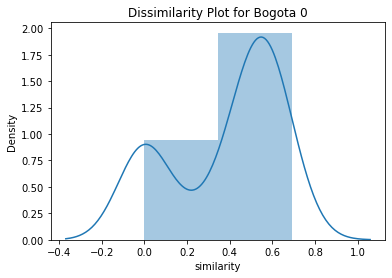

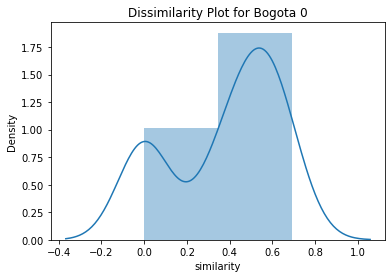

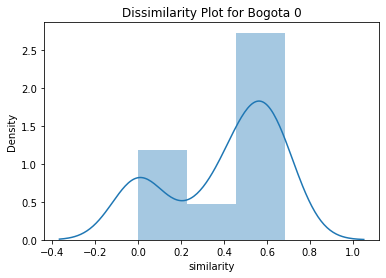

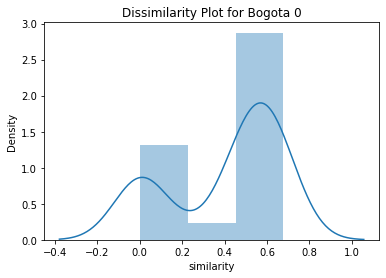

In [35]:
import seaborn as sns 

for df in [stage1_bogota0_high_similarity, stage2_bogota0_high_similarity, stage3_bogota0_high_similarity
                                        , stage4_bogota0_high_similarity]:
    plt.figure()
    plt.title("Dissimilarity Plot for Bogota 0")
    sns.distplot((np.log(1-df['similarity']+1)))

>> The plots are not particularly skewed, for bogota 0 ( no transparency ) is a bimodal. We can look at the mean since they are not particularly skewed. 

## Dissimilarity Plot for Bogota 1

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

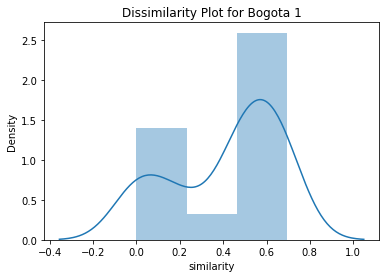

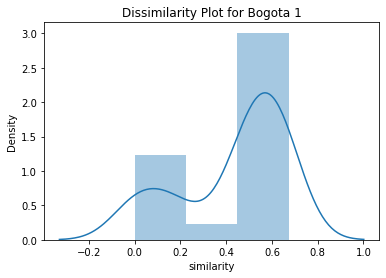

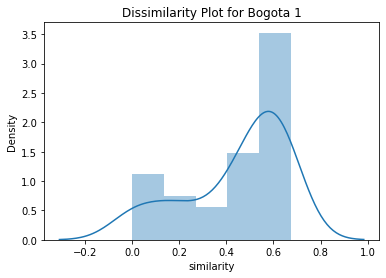

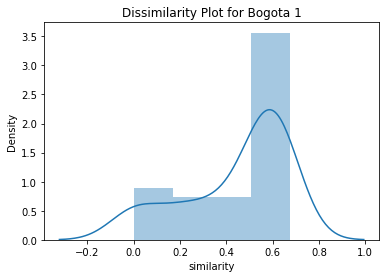

In [36]:
import seaborn as sns 

for df in [stage1_bogota1_high_similarity, stage2_bogota1_high_similarity, stage3_bogota1_high_similarity
                                        , stage4_bogota1_high_similarity]:
    plt.figure()
    plt.title("Dissimilarity Plot for Bogota 1")
    sns.distplot((np.log(1-df['similarity']+1)))

## Dissimilarity Plot for Bogota 2

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

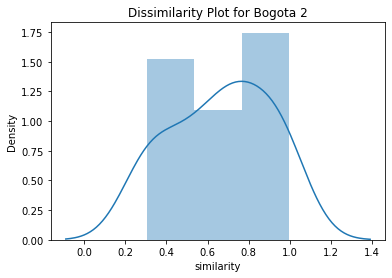

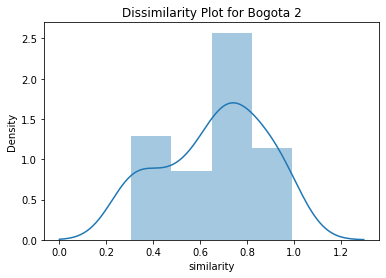

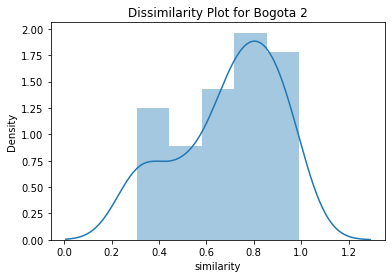

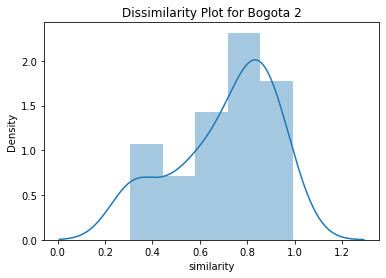

In [37]:
import seaborn as sns 

for df in [stage1_bogota2_high_similarity, stage2_bogota2_high_similarity, stage3_bogota2_high_similarity
                                        , stage4_bogota2_high_similarity]:
    plt.figure()
    plt.title("Dissimilarity Plot for Bogota 2")
    sns.distplot((1-np.log(df['similarity']+1)))

## Disimilarity Plot for Bogota 3

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

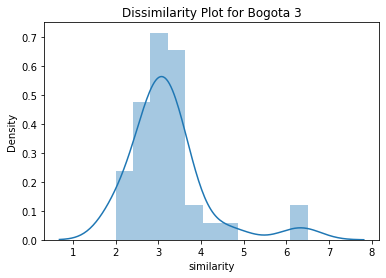

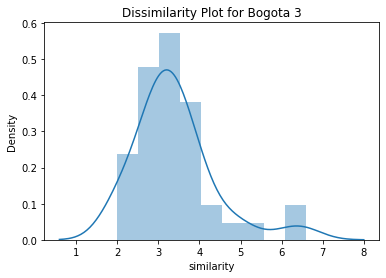

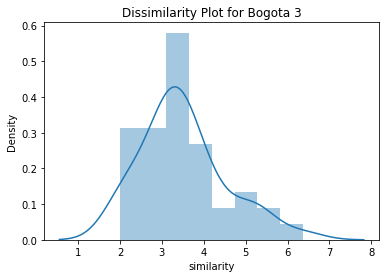

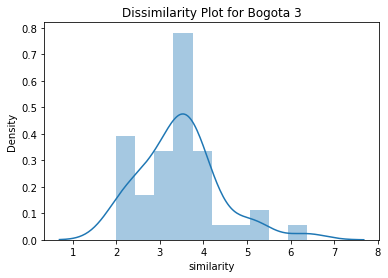

In [38]:
import seaborn as sns 

for df in [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity , stage4_bogota3_high_similarity]:
    plt.figure()
    plt.title("Dissimilarity Plot for Bogota 3")
    sns.distplot((1-np.log(df['similarity']))+1)

> Interpretation: The distributions of the dissimilarity is approximately normal which suggests that we can look at the mean. 

In [39]:
median_log_bogota3 = []
median_log_bogota2 = []
median_log_bogota1 = []
median_log_bogota0 = []

mean_log_bogota3 = []
mean_log_bogota2 = []
mean_log_bogota1 = []
mean_log_bogota0 = []

for df in [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity,  stage4_bogota3_high_similarity]:
    median_value = np.log((1-df['similarity'])+1).median()
    mean_value = np.log((1-df['similarity'])+1).mean()
    median_log_bogota3.append(median_value)
    mean_log_bogota3.append(mean_value)

for df in [stage1_bogota2_high_similarity, stage2_bogota2_high_similarity, stage3_bogota2_high_similarity, stage4_bogota2_high_similarity]:
    median_value = np.log((1-df['similarity'])+1).median()
    mean_value = np.log((1-df['similarity'])+1).mean()
    median_log_bogota2.append(median_value)
    mean_log_bogota2.append(mean_value)
    
for df in [stage1_bogota1_high_similarity, stage2_bogota1_high_similarity, stage3_bogota1_high_similarity, stage4_bogota1_high_similarity]:
    median_value = np.log((1-df['similarity'])+1).median()
    mean_value = np.log((1-df['similarity'])+1).mean()
    median_log_bogota1.append(median_value)
    mean_log_bogota1.append(mean_value)

for df in [stage1_bogota0_high_similarity, stage2_bogota0_high_similarity, stage3_bogota0_high_similarity, stage4_bogota0_high_similarity]:
    median_value = np.log((1-df['similarity'])+1).median()
    mean_value = np.log((1-df['similarity'])+1).mean()
    median_log_bogota0.append(median_value)
    mean_log_bogota0.append(mean_value)

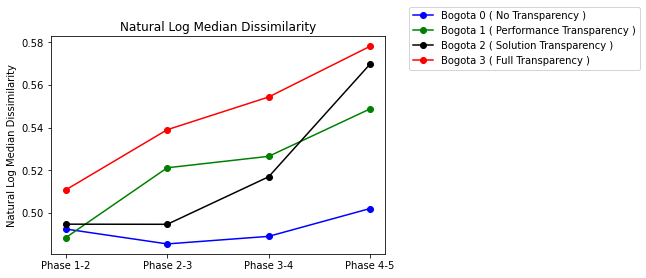

In [40]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = median_log_bogota0
y2 = median_log_bogota1
y3 = median_log_bogota2
y4 = median_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Natural Log Median Dissimilarity")
plt.ylabel("Natural Log Median Dissimilarity")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

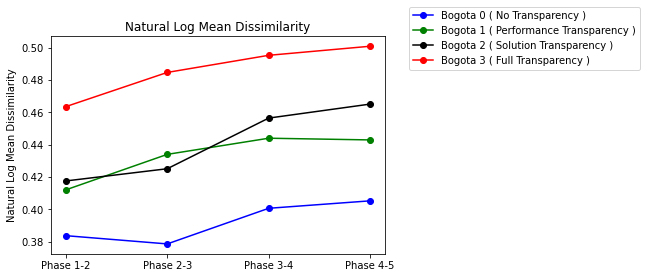

In [41]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = mean_log_bogota0
y2 = mean_log_bogota1
y3 = mean_log_bogota2
y4 = mean_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Natural Log Mean Dissimilarity")
plt.ylabel("Natural Log Mean Dissimilarity")
plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

> Without considering the effect of time, bogota 0 is different from bogota 3. Theoretically, transparency will lead to 
convergence from Bodreau and Bernstein paper. The first mechanism is about reuse and cognitive fixation. This mechanism is
explaining what solution transparency does. As a result, we might compare only 2 groups, those with and without solution transparency, and we would find that the 
opposite is through. 

> The second mechanism is social aspirations. March and Shapiro's paper on social aspirations. Brunswicker 2020 also explain that. 
The groups with performance transparency will have reference points that motivate them to jump and innovate if they are below the best. 
As a result, we might also compare those with and without performance transparency. 

> Run a t-test for each plot and phase. 


In [42]:
# T-tests between Bogota 2 and Bogota 1

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [stage1_bogota2_high_similarity, stage2_bogota2_high_similarity, stage3_bogota2_high_similarity,  stage4_bogota2_high_similarity],  [stage1_bogota1_high_similarity, stage2_bogota1_high_similarity, stage3_bogota1_high_similarity,  stage4_bogota1_high_similarity]
for x in range(len(list1)):
    for y in range(len(list2)):
        print('---------')
        print(retrieve_name(list1[x]) + ' and ' +retrieve_name(list2[y]) )
        print(ttest_ind(list1[x]['similarity'], list2[y]['similarity']))
        

---------
stage1_bogota2_high_similarity and stage1_bogota1_high_similarity
Ttest_indResult(statistic=-0.07454478088901784, pvalue=0.9408334229050362)
---------
stage1_bogota2_high_similarity and stage2_bogota1_high_similarity
Ttest_indResult(statistic=0.22014087551254188, pvalue=0.8265344637999938)
---------
stage1_bogota2_high_similarity and stage3_bogota1_high_similarity
Ttest_indResult(statistic=0.35929013111469166, pvalue=0.7206828359542572)
---------
stage1_bogota2_high_similarity and stage4_bogota1_high_similarity
Ttest_indResult(statistic=0.35662245461975256, pvalue=0.7226686065689807)
---------
stage2_bogota2_high_similarity and stage1_bogota1_high_similarity
Ttest_indResult(statistic=-0.16012847071874417, pvalue=0.8731886057608049)
---------
stage2_bogota2_high_similarity and stage2_bogota1_high_similarity
Ttest_indResult(statistic=0.21603046154606753, pvalue=0.8295208317114426)
---------
stage2_bogota2_high_similarity and stage3_bogota1_high_similarity
Ttest_indResult(statis

In [43]:
# T-tests between Bogota 3 and Bogota 0

import pandas as pd
import inspect

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [stage1_bogota3_high_similarity, stage2_bogota3_high_similarity, stage3_bogota3_high_similarity,  stage4_bogota3_high_similarity],  [stage1_bogota0_high_similarity, stage2_bogota0_high_similarity, stage3_bogota0_high_similarity,  stage4_bogota0_high_similarity]
for x in range(len(list1)):
    for y in range(len(list2)):
        print('---------')
        print(retrieve_name(list1[x]) + ' and ' +retrieve_name(list2[y]) )
        print(ttest_ind(list1[x]['similarity'], list2[y]['similarity']))

---------
stage1_bogota3_high_similarity and stage1_bogota0_high_similarity
Ttest_indResult(statistic=-1.49110088776901, pvalue=0.14007411658127075)
---------
stage1_bogota3_high_similarity and stage2_bogota0_high_similarity
Ttest_indResult(statistic=-1.5958489224943917, pvalue=0.11467272780826264)
---------
stage1_bogota3_high_similarity and stage3_bogota0_high_similarity
Ttest_indResult(statistic=-1.0997511878575346, pvalue=0.2749119487019029)
---------
stage1_bogota3_high_similarity and ___
Ttest_indResult(statistic=-0.9408083963813236, pvalue=0.34978384756735215)
---------
stage2_bogota3_high_similarity and stage1_bogota0_high_similarity
Ttest_indResult(statistic=-1.9860591804177452, pvalue=0.050632972907723256)
---------
stage2_bogota3_high_similarity and stage2_bogota0_high_similarity
Ttest_indResult(statistic=-2.08676486826222, pvalue=0.040262984428785446)
---------
stage2_bogota3_high_similarity and stage3_bogota0_high_similarity
Ttest_indResult(statistic=-1.5984684180835789, p